In [1]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)  # Télécharge et décompresse le dataset

In [6]:
files = get_image_files(path / "images")  # Récupère toutes les images

In [7]:
def is_cat(x): return x[0].isupper()  # Label : les noms d’images commençant par une majuscule sont des chats

In [8]:
dls = ImageDataLoaders.from_name_func(
    path, files, label_func=is_cat, item_tfms=Resize(224)
)

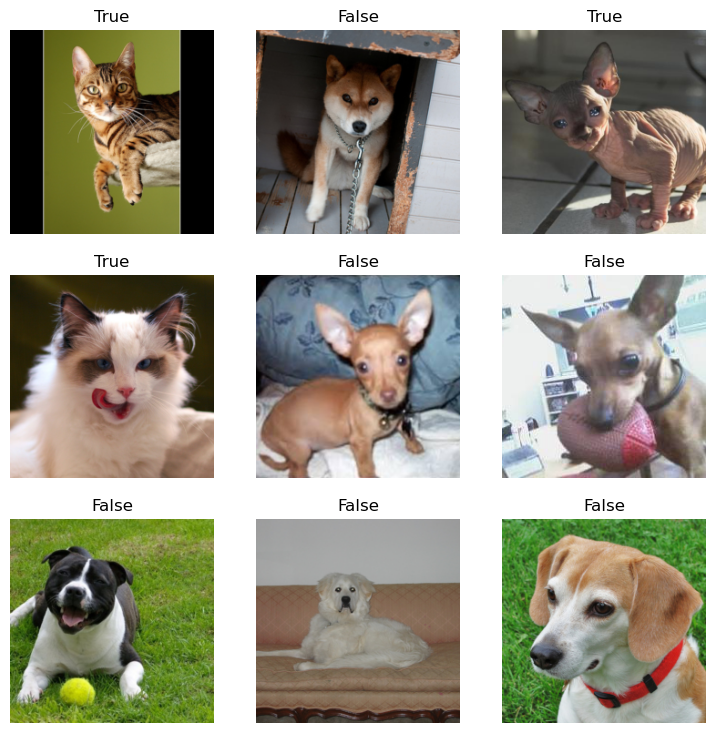

In [6]:
dls.show_batch()  # Affiche un lot d’images

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [8]:
learn.fine_tune(1)  # Entraîne le modèle

epoch,train_loss,valid_loss,error_rate,time
0,0.136149,0.015726,0.006089,3:13:43


epoch,train_loss,valid_loss,error_rate,time
0,0.060495,0.009984,0.005413,6:32:23


In [9]:
img = PILImage.create(path / "images" / "Abyssinian_1.jpg")  # Exemple d’image

In [10]:
pred, _, probs = learn.predict(img)

In [11]:
print(f"Prediction: {pred}, Probability: {probs[1]:.4f}")

Prediction: True, Probability: 1.0000


In [16]:
learn.export('C:\\Users\\ramzeen\\Desktop\\DECTITION\\Pratical Deep learnong for corders FAST_AI----KAGGLE\\pet_classifier.pkl')

In [10]:
# Charger le modèle
learn_inf = load_learner('C:\\Users\\ramzeen\\Desktop\\DECTITION\\Pratical Deep learnong for corders FAST_AI----KAGGLE\\Pratical Deep Learning for corders Lesson_1__ FAST_AI\\pet_classifier.pkl')

In [13]:
# Tester le modèle avec une image locale
img = PILImage.create('C:\\Users\\ramzeen\\Desktop\\DECTITION\\Pratical Deep learnong for corders FAST_AI----KAGGLE\\Pratical Deep Learning for corders Lesson_1__ FAST_AI\\chien.jfif')
pred, _, probs = learn_inf.predict(img)
print(f"Prediction: {pred}, Probability: {probs.max():.4f}")

Prediction: False, Probability: 1.0000


# Déployer avec Gradio
Gradio permet de créer une interface utilisateur simple et rapide.

In [15]:
!pip install gradio

  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ---------------------------------------- 0.0/57.6 MB ? eta -:--:--
   ---------------------------------------- 0.3/57.6 MB ? eta -:--:--
    --------------------------------------- 0.8/57.6 MB 1.5 MB/s eta 0:00:39
    --------------------------------------- 0.8/57.6 MB 1.5 MB/s eta 0:00:39
    --------------------------------------- 1.0/57.6 MB 1.3 MB/s eta 0:00:45
   - -------------------------------------- 1.6/57.6 MB 1.3 MB/s eta 0:00:43
   - -------------------------------------- 1.8/57.6 MB 1.4 MB/s eta 0:00:40
   - -------------------------------------- 2.4/57.6 MB 1.5 MB/s eta 0:00:38
   -- ------------------------------------- 2.9/57.6 MB 1.6 MB/s eta 0:00:34
   -- ------------------------------------- 3.4/57.6 MB 1.7 MB/s eta 0:00:32
   -- ------------------------------------- 3.9/57.6 MB 1.8 MB/s eta 0:00:30
   --- ------------------------------------ 4.7/57.6 MB 2.0 MB/s eta 0:00:27
   --- ------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.10.6 which is incompatible.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.8.0 which is incompatible.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2024.12.0 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import gradio as gr

In [17]:
# Fonction pour prédire
def classify_image(img):
    pred, _, probs = learn_inf.predict(img)
    return f"Prediction: {pred}, Probability: {probs.max():.4f}"

In [19]:
# Créer l'interface utilisateur
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),  # Remplacez gr.inputs.Image par gr.Image
    outputs="text"
)

In [20]:
# Lancer l'interface
interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Déployer avec FastAPI (serveur API RESTful)
FastAPI permet d’exposer un modèle comme une API pouvant être consommée par d’autres applications.

In [21]:
from fastapi import FastAPI, UploadFile
from fastai.vision.all import *

app = FastAPI()

# Charger le modèle
learn_inf = load_learner('pet_classifier.pkl')

@app.post("/predict/")
async def predict(file: UploadFile):
    img = PILImage.create(await file.read())
    pred, _, probs = learn_inf.predict(img)
    return {"prediction": pred, "probability": float(probs.max())}

# Lancer le serveur avec : uvicorn script_name:app --reload